<a href="https://colab.research.google.com/github/namita-ach/Statistical-Modeling-Neuronal-Activity/blob/main/SyntheticNeuronalActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
# random seed for reproducibility
np.random.seed(42)

In [4]:
# Assume we have two types of neurons with different firing patterns
n_samples = 1000
firing_rates_class1 = np.random.normal(loc=5, scale=1, size=n_samples // 2)
firing_rates_class2 = np.random.normal(loc=15, scale=3, size=n_samples // 2)
firing_rates = np.concatenate([firing_rates_class1, firing_rates_class2])

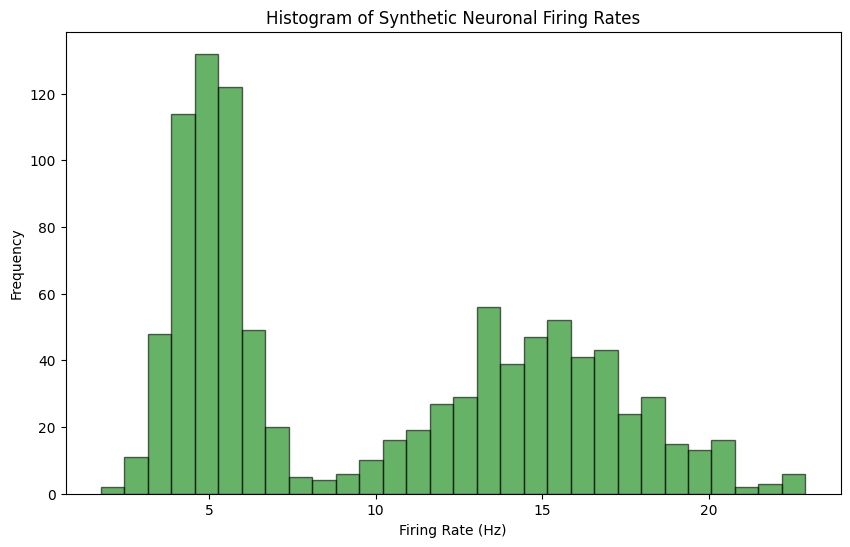

In [5]:
# let's look at how this is on a graph
plt.figure(figsize=(10, 6))
plt.hist(firing_rates, bins=30, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Synthetic Neuronal Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# now let's reshape for a gaussian mixture model
firing_rates = firing_rates.reshape(-1, 1)

In [7]:
#and now we fit a GMM
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(firing_rates)

GaussianMixture(n_components=2, random_state=42)

In [8]:
# Move over to predicting the labels for each data point
labels = gmm.predict(firing_rates)

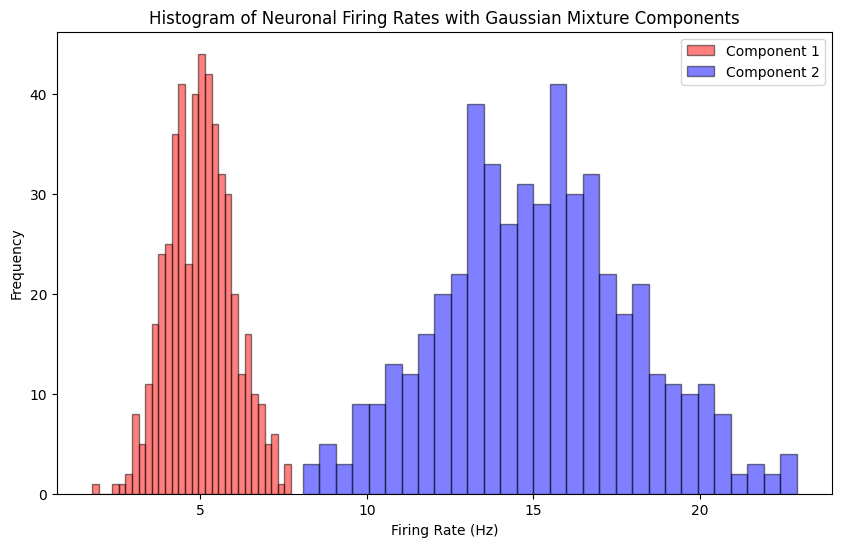

In [9]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(firing_rates[labels == 0], bins=30, alpha=0.5, color='r', edgecolor='black', label='Component 1')
plt.hist(firing_rates[labels == 1], bins=30, alpha=0.5, color='b', edgecolor='black', label='Component 2')
plt.title('Histogram of Neuronal Firing Rates with Gaussian Mixture Components')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
# what are the GMM params?
print("GMM Means:", gmm.means_.flatten())
print("GMM Covariances:", gmm.covariances_.flatten())
print("GMM Weights:", gmm.weights_)

GMM Means: [ 5.00015479 15.0763851 ]
GMM Covariances: [0.93560463 8.72195669]
GMM Weights: [0.49872093 0.50127907]
